In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv('iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
import seaborn as sns 

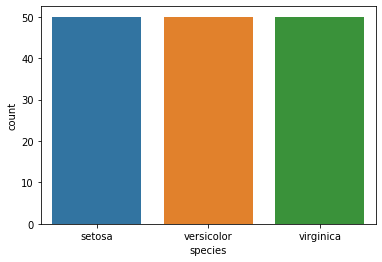

In [6]:
sns.countplot(x='species',data=df)

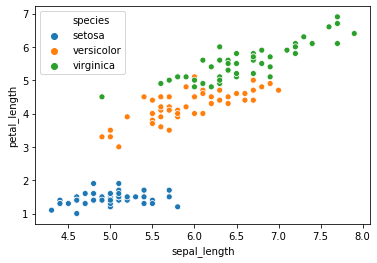

In [7]:
sns.scatterplot(x='sepal_length',y='petal_length',data=df,hue='species')

In [8]:
import matplotlib.pyplot as plt 

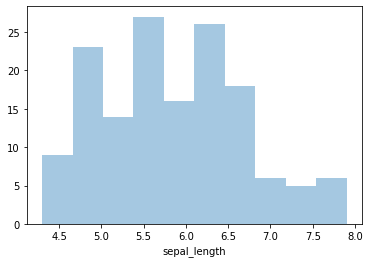

In [9]:
sns.distplot(df['sepal_length'],kde=False,bins=10)

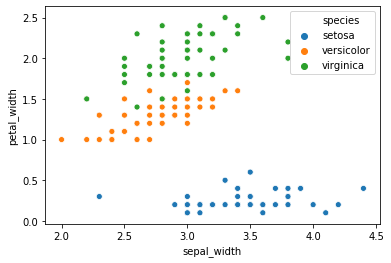

In [10]:
sns.scatterplot(x='sepal_width',y='petal_width',data=df,hue='species')

In [11]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [12]:
model=Sequential()

In [13]:
X=df.drop('species',axis=1)

In [14]:
y=df.iloc[:,-1]

In [15]:
y.shape

(150,)

In [16]:
y=y.map({'setosa':0,'versicolor':1,'virginica':2})

In [17]:
from keras.utils import to_categorical

In [18]:
y=to_categorical(y)

In [19]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.1,stratify=y)

In [22]:
model.add(Dense(4,activation='relu',input_shape=(4,)))
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 128)               640       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 387       
Total params: 1,047
Trainable params: 1,047
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
135/135 [==============================] - 0s 733us/step - loss: 1.1615 - accuracy: 0.2889
Epoch 2/100
135/135 [==============================] - 0s 52us/step - loss: 1.0512 - accuracy: 0.3111
Epoch 3/100
135/135 [==============================] - 0s 44us/step - loss: 1.0574 - accuracy: 0.3333
Epoch 4/100
135/135 [==============================] - 0s 44us/step - loss: 1.0657 - accuracy: 0.3333
Epoch 5/100
135/135 [==============================] - 0s 37us/step - loss: 1.0398 - accuracy: 0.3852
Epoch 6/100
135/135 [==============================] - 0s 59us/step - loss: 1.0236 - accuracy: 0.3407
Epoch 7/100
135/135 [==============================] - 0s 44us/step - loss: 1.0106 - accuracy: 0.3333
Epoch 8/100
135/135 [==============================] - 0s 52us/step - loss: 0.9992 - accuracy: 0.3333
Epoch 9/100
135/135 [==============================] - 0s 44us/step - loss: 0.9899 - accuracy: 0.3407
Epoch 10/100
135/135 [==============================] - 0s 52us/step - loss: 0.97

In [28]:
metrics=pd.DataFrame(model.history.history)

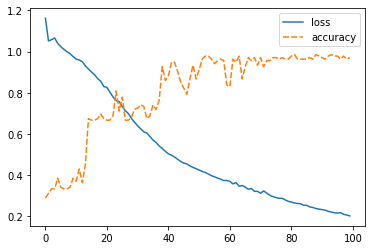

In [34]:
sns.lineplot(data=metrics)

In [35]:
model.save('iris.h5')

In [36]:
from keras.models import load_model

In [38]:
loaded_model = load_model('iris.h5')

In [40]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 128)               640       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 387       
Total params: 1,047
Trainable params: 1,047
Non-trainable params: 0
_________________________________________________________________


In [41]:
score=loaded_model.evaluate(X_test,y_test)

15/15 [==============================] - 0s 1ms/step


In [42]:
print('Score',score)

Score [0.1841171234846115, 1.0]
